### FUNCTIONS TO BE INVOKED IN METHODS FOR VICTOR

In [179]:
def base_google_methods(path):
    
    from google.cloud import vision
    # Explicitly specify the credentials using a service account key file
    from google.oauth2 import service_account
    credentials = service_account.Credentials.from_service_account_file('/Users/jferro/Downloads/fast-pagoda-402720-33f7363eed6b.json')
    
    # Initialize the client with the specified credentials
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    
    return client, image
    

# -------------------------------------------------------------------------------------


def detect_document(path):
    """Detects document features in an image."""
    client, image = base_google_methods(path)
    
    response = client.document_text_detection(image=image)

    words = []
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print(f"\nBlock confidence: {block.confidence}\n")

            for paragraph in block.paragraphs:
                print("Paragraph confidence: {}".format(paragraph.confidence))

                for word in paragraph.words:
                    word_text = "".join([symbol.text for symbol in word.symbols])
                    print(
                        "Word text: {} (confidence: {})".format(
                            word_text, word.confidence
                        )
                    )
                    words.append(word_text)

                    for symbol in word.symbols:
                        print(
                            "\tSymbol: {} (confidence: {})".format(
                                symbol.text, symbol.confidence
                            )
                        )

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    
    return words


# -------------------------------------------------------------------------------------


def detect_labels(path):
    """Detects labels in the file."""
    
    client, image = base_google_methods(path)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    
    response_2 = ''
    
    response_2 += "LABELS: \n"

    for label in labels:
        response_2 += label.description + '\n'

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    
    return response_2


# -------------------------------------------------------------------------------------


def detect_landmarks(path):
    """Detects landmarks in the file."""
    client, image = base_google_methods(path)
    
    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print("Landmarks:")

    for landmark in landmarks:
        print(landmark.description)
        for location in landmark.locations:
            lat_lng = location.lat_lng
            print(f"Latitude {lat_lng.latitude}")
            print(f"Longitude {lat_lng.longitude}")

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

    return response


# -------------------------------------------------------------------------------------


def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    client, image = base_google_methods(path)

    objects = client.object_localization(image=image).localized_object_annotations
    response_2 = ''
    
    response_2 += f"Number of objects found: {len(objects)}\n"
    for object_ in objects:
        response_2 += f"\n{object_.name} (confidence: {object_.score})"
        response_2 +="Normalized bounding polygon vertices: "
        for vertex in object_.bounding_poly.normalized_vertices:
            response_2 += f" - ({vertex.x}, {vertex.y})\n"
        
    return response_2


# -------------------------------------------------------------------------------------


def detect_safe_search(path):
    """Detects unsafe features in the file."""
    client, image = base_google_methods(path)

    response = client.safe_search_detection(image=image)
    safe = response.safe_search_annotation

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = (
        "UNKNOWN",
        "VERY_UNLIKELY",
        "UNLIKELY",
        "POSSIBLE",
        "LIKELY",
        "VERY_LIKELY",
    )
    response_2 = ''
    response_2 += f"adult: {likelihood_name[safe.adult]}\n"
    response_2 += f"medical: {likelihood_name[safe.medical]}\n"
    response_2 += f"spoofed: {likelihood_name[safe.spoof]}\n"
    response_2 += f"violence: {likelihood_name[safe.violence]}\n"
    response_2 += f"racy: {likelihood_name[safe.racy]}\n"

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
        
    return response_2

# -------------------------------------------------------------------------------------


def detect_web(path):
    """Detects web annotations given an image."""
    client, image = base_google_methods(path)

    response = client.web_detection(image=image)
    annotations = response.web_detection
    
    response_2 = ''

    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            response_2 += f"BEST LABEL:\n{label.label}"

    if annotations.web_entities:
        response_2 += "\n\nOTHER LABELS: ".format(len(annotations.web_entities))

        for entity in annotations.web_entities:
            if entity.score >= 0.5:
                response_2 += f"\n{str(round(entity.score, 2))} : {entity.description}"

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

    return response_2

# -------------------------------------------------------------------------------------


# Call the function with the path to your image file
# response = detect_document("/Users/jferro/Downloads/hack.jpg")
# response = detect_labels("/Users/jferro/Downloads/hack.jpg")
# response = detect_landmarks('/Users/jferro/Downloads/statue.jpeg')
# response = localize_objects('/Users/jferro/Downloads/statue.jpeg')
# response = detect_safe_search('/Users/jferro/Downloads/statue.jpeg')
# response = detect_web('/Users/jferro/Downloads/statue.jpeg')


### CLASS FOR VICTOR

In [180]:
class google_julen:

    # Method 1
    def detect_document_method(self, path):
        # Method code here
        return detect_document(path)
    
    # Method 1
    def detect_labels_method(self, path):
        # Method code here
        return detect_labels(path)
    
    # Method 1
    def detect_landmarks_method(self, path):
        # Method code here
        return detect_landmarks(path)
    
    # Method 1
    def localize_objects_method(self, path):
        # Method code here
        return localize_objects(path)
    
    # Method 1
    def detect_safe_search_method(self, path):
        # Method code here
        return detect_safe_search(path)

    # Method 1
    def detect_web_method(self, path):
        # Method code here
        return detect_web(path)
    

### TESTING WITH A PDF

In [ ]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Define the path to your PDF file
pdf_file = 'CS229_Lecture_Notes.pdf'

# Store PDF pages as images
images = convert_from_path(pdf_file)


In [ ]:
import os

# Create a directory to store the images if it doesn't exist
output_directory = 'pdf_images'
os.makedirs(output_directory, exist_ok=True)

# Save each image with the page number as the file name
for i, image in enumerate(images):
    # Create a file name using the page number
    file_name = os.path.join(output_directory, f'page_{i + 1}.png')
    
    # Save the image as a PNG file
    image.save(file_name, 'PNG')




### ONWARDS

### PDFS

In [186]:
from PIL import Image, ImageDraw, ImageFont
import os
import glob

def write_headers(png_path, responses):
    folder_path_out = "/Users/jferro/Desktop/work/repos/KingsOfRecursion/research_julen/google_api/pdf_images_comments"
    os.makedirs(folder_path_out, exist_ok = True)
    
    # Define font size and color
    font_size = 20
    font_color = (255, 255, 255)  # White

    # Iterate through the image files
    # Load the image
    image = Image.open(png_path)
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Define the header (red container) parameters
    header_height = 200
    header_color = (255, 0, 0)  # Red
    
    # Define the width of each subtitle based on the number of responses
    num_responses = len(responses)  # Change this according to your actual number of responses
    subtitle_width = image.width // num_responses
    
    # Iterate through the responses and add red headers with subtitles
    for j, response in enumerate(responses):
        # Calculate the position for the red header
        header_x1 = j * subtitle_width
        header_x2 = (j + 1) * subtitle_width
        header_y1 = 0
        header_y2 = header_height
        
        # Draw the red header
        draw.rectangle([header_x1, header_y1, header_x2, header_y2], fill=header_color)
        
        # Calculate the position for the subtitle text
        text_x = header_x1 + 10  # Adjust as needed for padding
        text_y = 10
        
        # Load a font (you may need to specify a font file)
        font = ImageFont.truetype("/Users/jferro/Desktop/work/repos/KingsOfRecursion/research_julen/google_api/arial.ttf", font_size)
        
        # Add the subtitle text to the image
        draw.text((text_x, text_y), response, fill=font_color, font=font)
    
    # Save the image with the red headers and subtitles
    output_path = os.path.join(folder_path_out, f"page_{i}.png")
    image.save(output_path)




In [187]:
from PIL import Image, ImageDraw, ImageFont
import os
import glob

# Specify the folder path where you want to search for .png files
folder_path = "/Users/jferro/Desktop/work/repos/KingsOfRecursion/research_julen/google_api/pdf_images"

# Use the glob module to search for .png files in the folder
png_files = glob.glob(os.path.join(folder_path, "*.png"))

for i, png_path in enumerate(png_files[:3]):
    response_1 = google_julen().detect_safe_search_method(png_path)
    response_2 = google_julen().detect_web_method(png_path)
    response_3 = google_julen().detect_labels_method(png_path)
    responses = [response_1, response_2, response_3]
    write_headers(png_path, responses)
    print(i)





0
1
2


### IMAGES

### HELPER INFO

In [190]:

# For PDF's

# google_julen().detect_safe_search_method(path)
# google_julen().detect_web_method(path)
# google_julen().detect_labels_method(path)


# HANDWRITTING (OCR)
# google_julen().detect_document_method(path)


path = "/Users/jferro/Desktop/work/repos/KingsOfRecursion/research_julen/google_api/pdf_images/page_2.png"

path = "/Users/jferro/Downloads/hack.jpg"

# response = google_julen().detect_document_method(path)
# google_julen().detect_labels_method(path)
# google_julen().detect_landmarks_method(path)
# google_julen().localize_objects_method(path)
# google_julen().detect_safe_search_method(path)
# google_julen().detect_web_method(path)

### HANDWRITTING


Block confidence: 0.8837599158287048

Paragraph confidence: 0.5260643362998962
Word text: 69 (confidence: 0.5260643362998962)
	Symbol: 6 (confidence: 0.3361549973487854)
	Symbol: 9 (confidence: 0.7159736752510071)
Paragraph confidence: 0.973183810710907
Word text: After (confidence: 0.9685325026512146)
	Symbol: A (confidence: 0.9080236554145813)
	Symbol: f (confidence: 0.9550215601921082)
	Symbol: t (confidence: 0.9914315342903137)
	Symbol: e (confidence: 0.9937555193901062)
	Symbol: r (confidence: 0.9944301247596741)
Word text: Use (confidence: 0.9809359908103943)
	Symbol: U (confidence: 0.9874358177185059)
	Symbol: s (confidence: 0.9882610440254211)
	Symbol: e (confidence: 0.9671110510826111)

Block confidence: 0.9685999751091003

Paragraph confidence: 0.9685999751091003
Word text: System (confidence: 0.948560357093811)
	Symbol: S (confidence: 0.8681122064590454)
	Symbol: y (confidence: 0.8817179799079895)
	Symbol: s (confidence: 0.9705238342285156)
	Symbol: t (confidence: 0.9939284

/var/folders/j3/m58g3xz11gx9v5lxn40nwnqm0000gq/T/ipykernel_1560/3281235268.py:27: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(header_text, font=font)


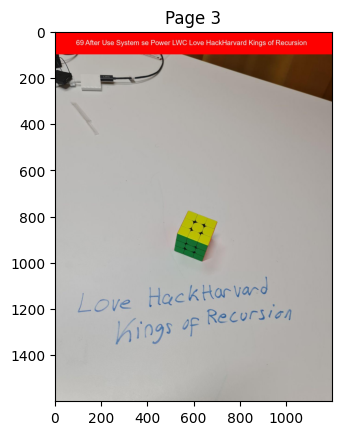

In [189]:
from PIL import Image, ImageDraw, ImageFont
import os

def add_header_to_image(image_path, header_text):
    # Open the image
    image = Image.open(image_path)
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Define header color and font
    header_color = (255, 0, 0)  # Red
    text_color = (255, 255, 255)  # White
    font = ImageFont.truetype("arial.ttf", 30)  # Use the path to an Arial font file
    
    # Get the image dimensions
    width, height = image.size
    
    # Define the header height (you can adjust this as needed)
    header_height = 100
    
    # Create a red header rectangle
    header_rect = [(0, 0), (width, header_height)]
    draw.rectangle(header_rect, fill=header_color)
    
    # Calculate text position to center it in the header
    text_width, text_height = draw.textsize(header_text, font=font)
    margin_x = 10
    text_x = (width - 2 * margin_x - text_width) / 2
    text_y = (header_height - text_height) / 2
    
    # Add the text to the header
    draw.text((text_x, text_y), header_text, fill=text_color, font=font)
    
    # Save the modified image
    base_name, ext = os.path.splitext(image_path)
    output_path = f"{base_name}_with_header{ext}"
    image.save(output_path)
    
    return output_path



import os

path = "/Users/jferro/Downloads/hack.jpg"

words= google_julen().detect_document_method(path)
text = (' ').join(words)

# Save the image as a PNG file
# image.save(file_name, 'PNG')
output_path = add_header_to_image(path, text)

image = Image.open(output_path)
plt.figure()
plt.imshow(image)
plt.title(f"Page {i + 1}")
plt.show()



